In [1]:
import torch
from PIL import Image
from torchviz import make_dot

In [2]:

x = torch.randn(4,requires_grad=True) # generates using normal distribution (0,1)
#y = torch.rand(4) # generates using uniform distribution (0,1)

print(x)
#print(y)

# pytorch creates a computational graphs for operations, used during backprop
y = x+2 # forward pass, we calculate the output
print(y)

z = y*y*2
z = z.mean()
print(z)


tensor([ 0.3778,  0.2474, -1.1034, -1.3760], requires_grad=True)
tensor([2.3778, 2.2474, 0.8966, 0.6240], grad_fn=<AddBackward0>)
tensor(5.9490, grad_fn=<MeanBackward0>)


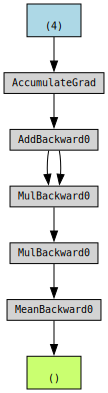

In [3]:
z.backward() # dz/dx, wont work if requires_grad = True wasnt defined above
make_dot(z)

In [4]:
print(x.grad) # this is done by multiplying the  jacobian matrxi with gradient vector to get final gradients (also called chain rule)


tensor([2.3778, 2.2474, 0.8966, 0.6240])


In [13]:
x, x.grad

(tensor([ 0.3778,  0.2474, -1.1034, -1.3760], requires_grad=True),
 tensor([2.3778, 2.2474, 0.8966, 0.6240]))

In [ ]:

z.backward() # if z is is not scalar, then we need to pass a vector of same dims to it
z.grad()
v= torch.tensor([0.1,1,0.001], dtype = torch.float32) 
v.backward()


#### preventing from tracking grad history

In [14]:
# 3 ways  - requires_grad_ , detach, inside with torch.no_grad()
print(x)
x.requires_grad_(False) # trailing _ so modifies inplace
print(x)


tensor([ 0.3778,  0.2474, -1.1034, -1.3760], requires_grad=True)
tensor([ 0.3778,  0.2474, -1.1034, -1.3760])


In [16]:
x = torch.randn(4,requires_grad=True) # generates using normal distribution (0,1)
y =x.detach()
print(x,y)

tensor([ 0.0690,  1.0264, -1.5974,  0.0115], requires_grad=True) tensor([ 0.0690,  1.0264, -1.5974,  0.0115])


In [20]:
# example of gradient accumulation

weights = torch.ones(4,requires_grad=True)
for epoch in range(5):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


In [21]:
# gradient are getting added to we need to empty the gradients before next iteration
weights = torch.ones(4,requires_grad=True)
for epoch in range(5):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
optimizer = torch.optim.SGD(weights,lr = 0.01)
optimizer.step()
optimizer.zero_grad()